<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Центральная предельная теорема. 

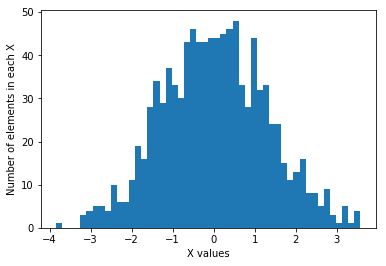

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sts
%matplotlib inline
number_of_sums = 1000
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Изменение данных с помощью матрицы ковариаций

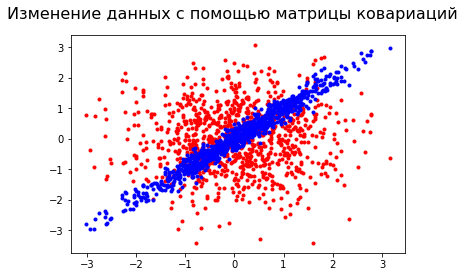

In [7]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

2 метода подсчета разброса данных

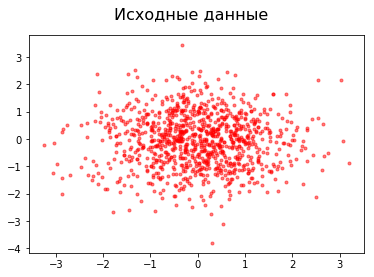

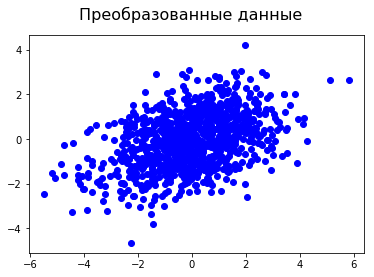

In [8]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = np.matrix('2 1; 1 2')
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Проецируем данные на вектор, разброс:

In [9]:
i = 45
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  3.018369120602095
теоритический подсчет:  [[2.89399666]]


Как меняется вариация в зависимости от выбора собственного вектора

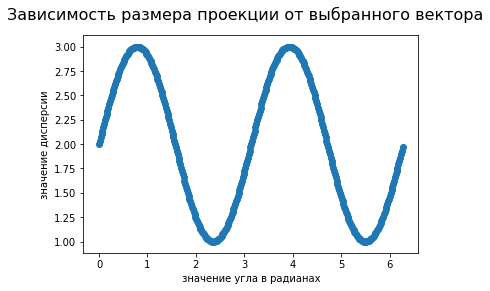

In [10]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Чистые данные

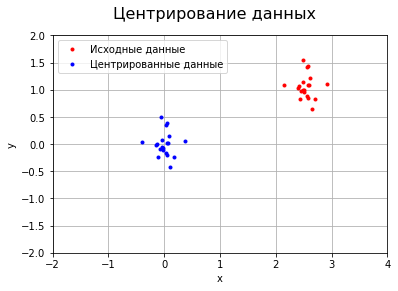

In [11]:
def mean_centering(X):
    mu = np.mean(X, axis=0)
    return X- np.ones((X.shape[0],2))*mu
n=20
mu = [2.5, 1]
mu_add = np.ones((n,2))*mu
Xa = np.random.randn(n,2)*0.25
Xa = Xa + mu_add
Ya = mean_centering(Xa)
plt.suptitle('Центрирование данных', fontsize=16)  
plt.plot(Xa[:,0], Xa[:,1], 'r.')
plt.plot(Ya[:,0], Ya[:,1], 'b.')
plt.legend(['Исходные данные','Центрированные данные'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-2,4,-2,2])
plt.grid()

# Поиск собственного вектора

1.7000000000000002 [0.70710678 0.70710678]


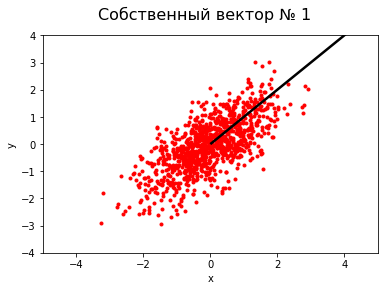

0.30000000000000016 [-0.70710678  0.70710678]


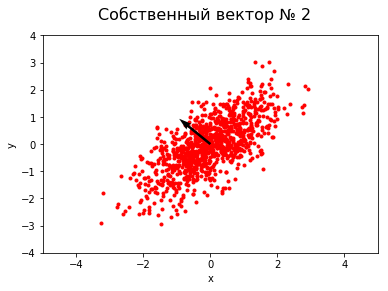

In [12]:
import numpy.linalg as la
n=1000
Cb = [[1,0.7],[0.7,1]]
Ab = la.cholesky(Cb)
Xb = np.random.randn(n,2)
Yb = np.dot(Ab,Xb.T)
w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(2.5/w[i]), zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

Проекция на ось X

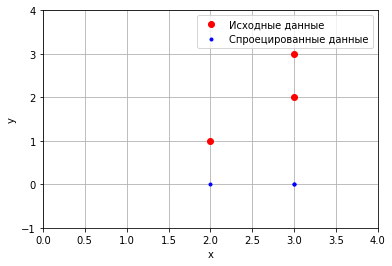

In [13]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[1,0],[0,0]]) # проекция на ось x
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,-1,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

Проецирование на прямую

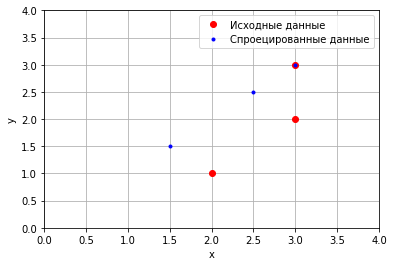

In [14]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[.5,.5],[.5,.5]]) # проецирование на прямую x=y
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Пример поиска собственных векторов

Сортируем вектора в порядке убывания

In [15]:
Xe = np.array([[2,1],[3,2],[3,3]])
X_mc = mean_centering(Xe)
Z = np.dot(X_mc.T,X_mc); w,v = la.eig(Z)
idx = w.argsort()[::-1]   
w = w[idx]; v = v[:,idx]

2.5351837584879964 [-0.47185793 -0.8816746 ]


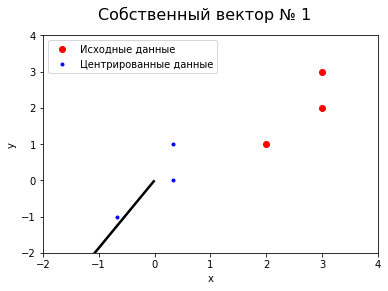

0.13148290817867014 [-0.8816746   0.47185793]


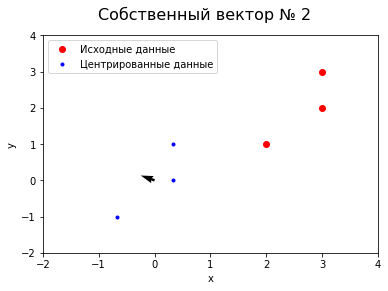

In [16]:
for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)
    plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
    plt.plot(X_mc[:,0], X_mc[:,1], 'b.', label="Центрированные данные")
    plt.axis([-2,4,-2,4]); plt.legend(); print(w[i], v[:,i])
    plt.xlabel('x')
    plt.ylabel('y')    
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(3/w[i]), zorder=2); plt.show()

Пример из kaggle: https://www.kaggle.com/uciml/faulty-steel-plates

In [17]:
import io
import requests
url="http://yustiks.ru/faults.csv"
dataset_temp=pd.read_csv(url) 
dataset_temp.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity      ...       Orientation_Index  Luminosity_Index  \
0                    108      ...                  0.8182           -0.2913   
1                    123      ...                  0.7931           -0.1756   
2                    125      ...                  0.6667           -0.1228   
3                    126      ...                  0.8444           -0.1568   
4                    126      ...                  0.9338           -0.1992   

   SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0          0.5822       1          0         0       0          0      0   
1          0.2984       1          0         0       0          0      0   
2          0.2150       1          0         0       0          0      0   
3          0.5212       1          0         0       0          0      0   
4          1.0000       1          0         0       0          0      0   

   Other_Faults  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [18]:
#7 последних строк - классы 
label_columns=dataset_temp.columns.values[-7:]

#удаляем 7 столбцов
dataset=dataset_temp.drop(label_columns,axis=1)

In [19]:
dataset.shape

(1941, 27)

In [20]:
describe=dataset.describe().T
describe

count          mean           std        min  \
X_Minimum              1941.0  5.711360e+02  5.206907e+02     0.0000   
X_Maximum              1941.0  6.179645e+02  4.976274e+02     4.0000   
Y_Minimum              1941.0  1.650685e+06  1.774578e+06  6712.0000   
Y_Maximum              1941.0  1.650739e+06  1.774590e+06  6724.0000   
Pixels_Areas           1941.0  1.893878e+03  5.168460e+03     2.0000   
X_Perimeter            1941.0  1.118552e+02  3.012092e+02     2.0000   
Y_Perimeter            1941.0  8.296600e+01  4.264829e+02     1.0000   
Sum_of_Luminosity      1941.0  2.063121e+05  5.122936e+05   250.0000   
Minimum_of_Luminosity  1941.0  8.454869e+01  3.213428e+01     0.0000   
Maximum_of_Luminosity  1941.0  1.301937e+02  1.869099e+01    37.0000   
Length_of_Conveyer     1941.0  1.459160e+03  1.445778e+02  1227.0000   
TypeOfSteel_A300       1941.0  4.003091e-01  4.900872e-01     0.0000   
TypeOfSteel_A400       1941.0  5.996909e-01  4.900872e-01     0.0000   
Steel_Plate_Thickness  1941.0  7.873776e+01  5.508603e+01    40.0000   
Edges_Index            1941.0  3.317152e-01  2.997117e-01     0.0000   
Empty_Index            1941.0  4.142033e-01  1.372615e-01     0.0000   
Square_Index           1941.0  5.707671e-01  2.710584e-01     0.0083   
Outside_X_Index        1941.0  3.336110e-02  5.896117e-02     0.0015   
Edges_X_Index          1941.0  6.105286e-01  2.432769e-01     0.0144   
Edges_Y_Index          1941.0  8.134722e-01  2.342736e-01     0.0484   
Outside_Global_Index   1941.0  5.757342e-01  4.823520e-01     0.0000   
LogOfAreas             1941.0  2.492388e+00  7.889299e-01     0.3010   
Log_X_Index            1941.0  1.335686e+00  4.816116e-01     0.3010   
Log_Y_Index            1941.0  1.403271e+00  4.543452e-01     0.0000   
Orientation_Index      1941.0  8.328764e-02  5.008680e-01    -0.9910   
Luminosity_Index       1941.0 -1.313050e-01  1.487668e-01    -0.9989   
SigmoidOfAreas         1941.0  5.854205e-01  3.394518e-01     0.1190   

                               25%           50%           75%           max  
X_Minimum                  51.0000  4.350000e+02  1.053000e+03  1.705000e+03  
X_Maximum                 192.0000  4.670000e+02  1.072000e+03  1.713000e+03  
Y_Minimum              471253.0000  1.204128e+06  2.183073e+06  1.298766e+07  
Y_Maximum              471281.0000  1.204136e+06  2.183084e+06  1.298769e+07  
Pixels_Areas               84.0000  1.740000e+02  8.220000e+02  1.526550e+05  
X_Perimeter                15.0000  2.600000e+01  8.400000e+01  1.044900e+04  
Y_Perimeter                13.0000  2.500000e+01  8.300000e+01  1.815200e+04  
Sum_of_Luminosity        9522.0000  1.920200e+04  8.301100e+04  1.159141e+07  
Minimum_of_Luminosity      63.0000  9.000000e+01  1.060000e+02  2.030000e+02  
Maximum_of_Luminosity     124.0000  1.270000e+02  1.400000e+02  2.530000e+02  
Length_of_Conveyer       1358.0000  1.364000e+03  1.650000e+03  1.794000e+03  
TypeOfSteel_A300            0.0000  0.000000e+00  1.000000e+00  1.000000e+00  
TypeOfSteel_A400            0.0000  1.000000e+00  1.000000e+00  1.000000e+00  
Steel_Plate_Thickness      40.0000  7.000000e+01  8.000000e+01  3.000000e+02  
Edges_Index                 0.0604  2.273000e-01  5.738000e-01  9.952000e-01  
Empty_Index                 0.3158  4.121000e-01  5.016000e-01  9.439000e-01  
Square_Index                0.3613  5.556000e-01  8.182000e-01  1.000000e+00  
Outside_X_Index             0.0066  1.010000e-02  2.350000e-02  8.759000e-01  
Edges_X_Index               0.4118  6.364000e-01  8.000000e-01  1.000000e+00  
Edges_Y_Index               0.5968  9.474000e-01  1.000000e+00  1.000000e+00  
Outside_Global_Index        0.0000  1.000000e+00  1.000000e+00  1.000000e+00  
LogOfAreas                  1.9243  2.240600e+00  2.914900e+00  5.183700e+00  
Log_X_Index                 1.0000  1.176100e+00  1.518500e+00  3.074100e+00  
Log_Y_Index                 1.0792  1.322200e+00  1.732400e+00  4.258700e+00  
Orientation_Index          -0.33

Гистораммы распределений векторов

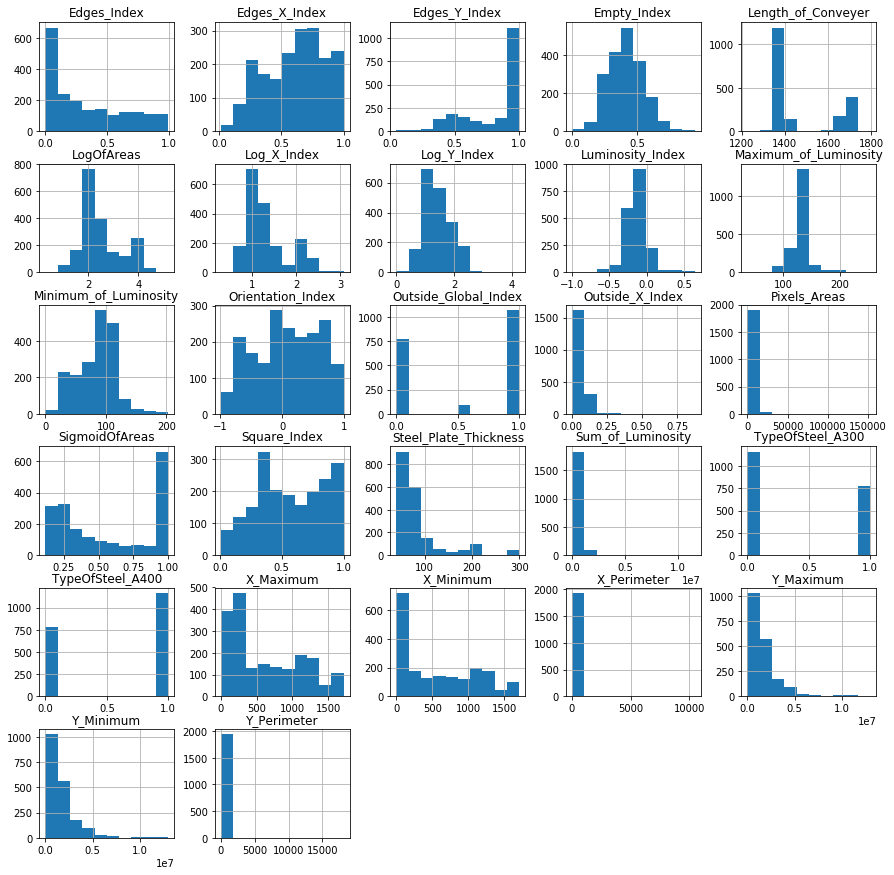

In [21]:
dataset.hist(figsize=(15,15))
plt.show()

Плотность распределения

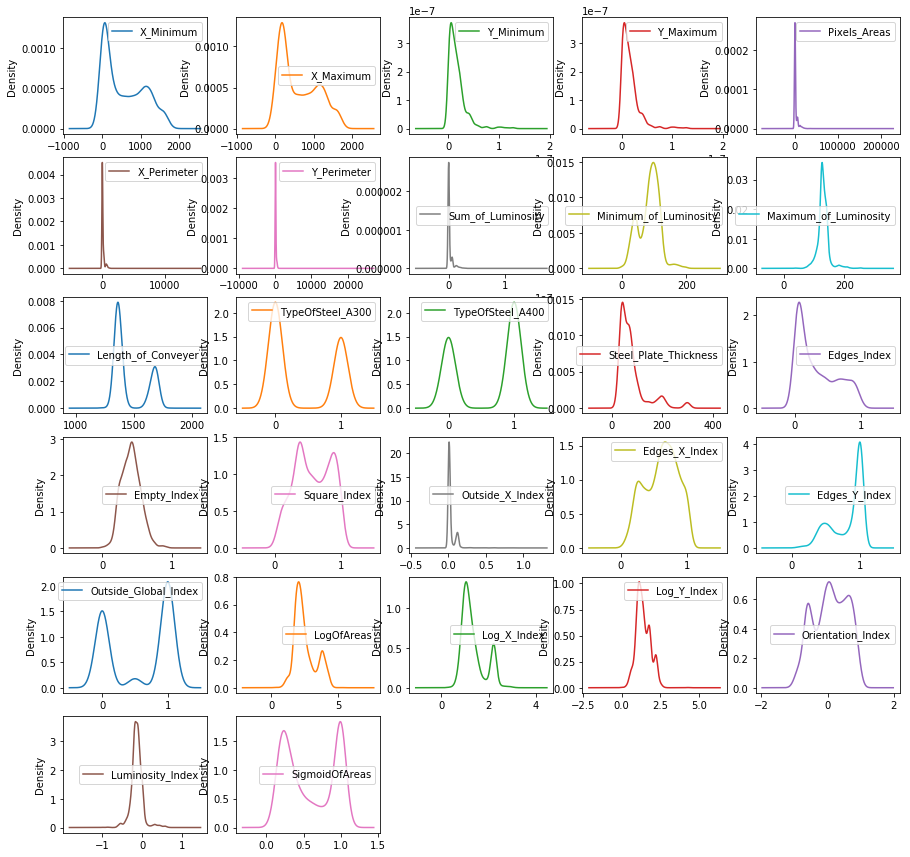

In [22]:
dataset.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

Матрица корелляций

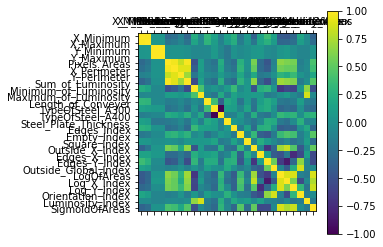

In [23]:
plt.matshow(dataset.corr())
plt.xticks(range(len(dataset.columns)), dataset.columns)
plt.yticks(range(len(dataset.columns)), dataset.columns)
plt.colorbar()
plt.show()


для получения наиболее полной информации о взаимодействии количественных признаков (в лоб) между собой в pandas-DataFrame воспользуемся библиотекой seaborn и ее методом pairplot:
sns.pairplot(df);

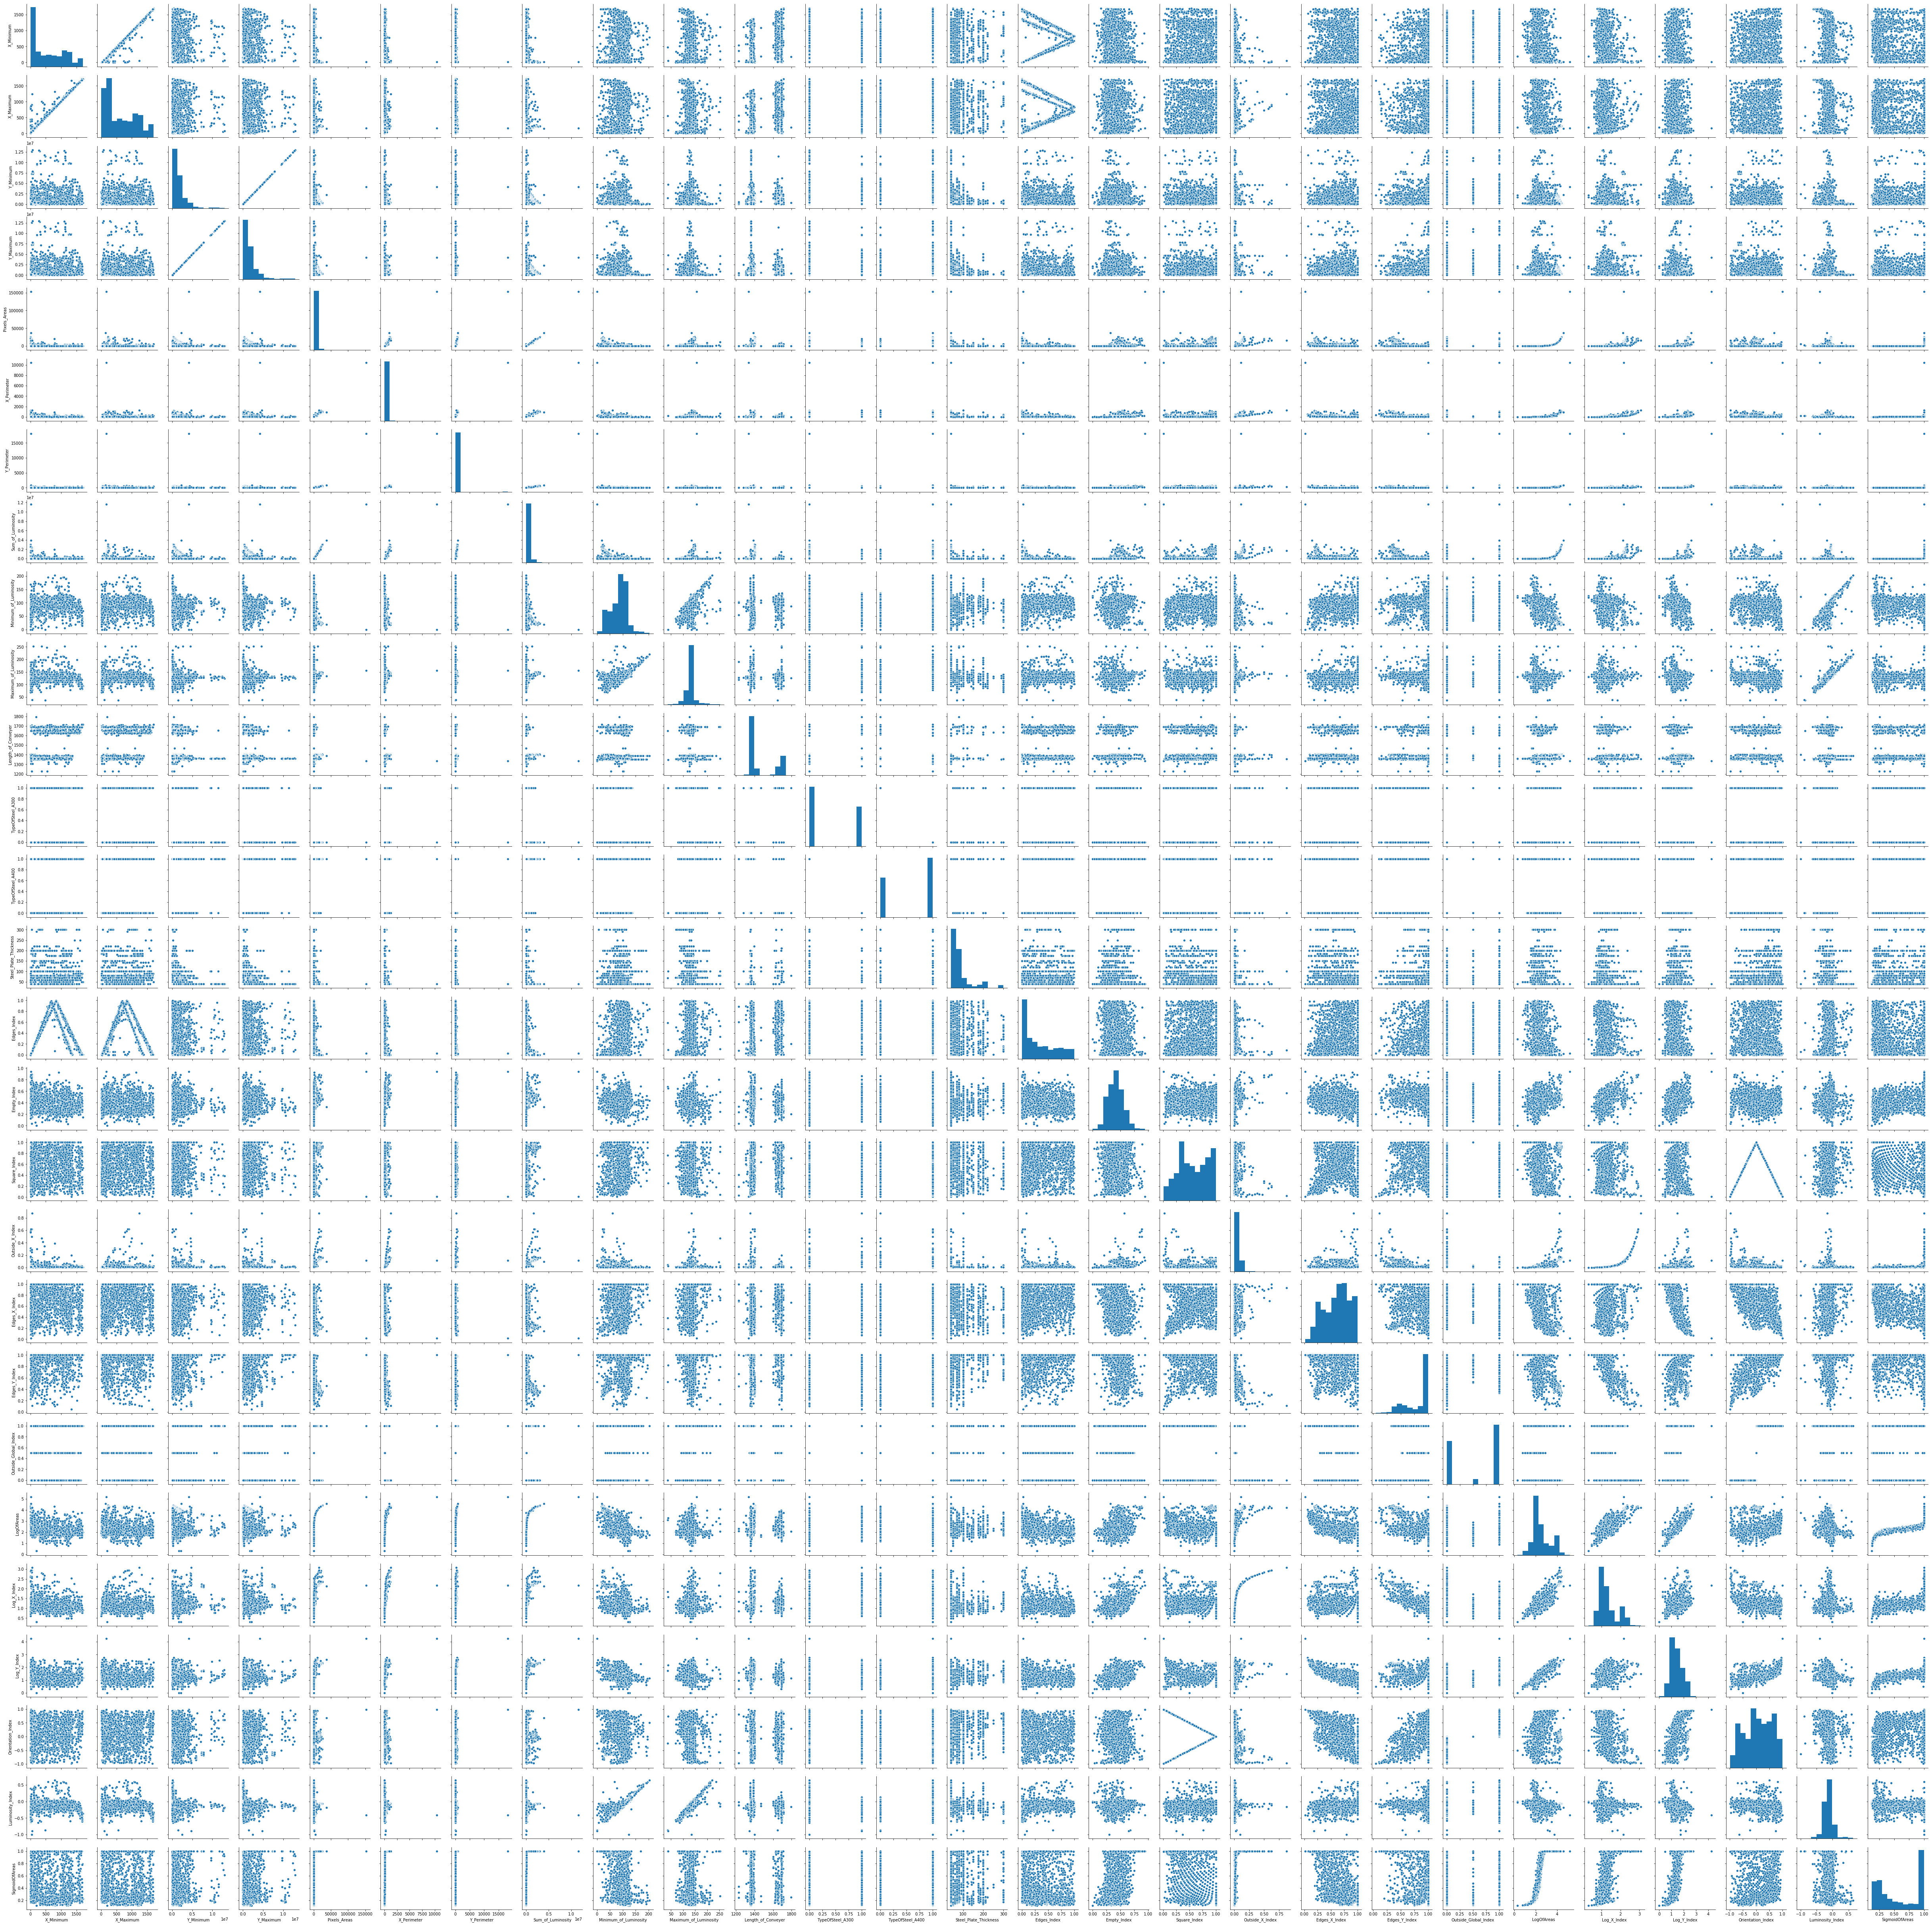

In [24]:
import seaborn as sns
sns.pairplot(dataset);

# Теория вероятности

Задача о днях рождения
Какова вероятность того, что из N людей хотя бы у двух совпадают дни рождения?

Моделировать задачу будет от противного, т.е. определим, какова вероятность того, что у N людей все дни рождения - разные? Последовательные рассуждения имеют следующий вид.

Пронумеруем все дни от 0 до 364 и сформируем случайный массив таких чисел длинной , далее определим, все ли числа в полученном массиве - разные. 


In [25]:
import numpy

from numpy import round
from numpy.random import uniform

def p(N):
    T = 10000 # Number of tryouts
    tryout = lambda: len(set(round(uniform(size=N) * 356))) == N
    return 1 - sum(int(tryout()) for _ in range(T)) / float(T)

можно по данной функции простроить график плотности распределения:

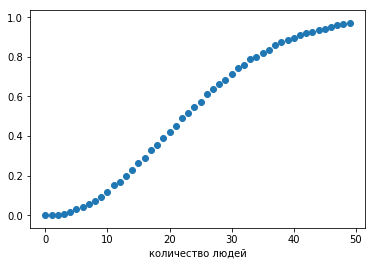

In [27]:
data = [i for i in range(0, 50)]
P =  [p(i) for i in range(0, 50)]
plt.scatter(data, P)
plt.xlabel('количество людей')
plt.title('')
plt.show()